# Gradient Descent

Input x = 0.200000, Gewünschter Output y = 0.20
Iter	x	w	net i	a	y_hat	y	E	E'	w delta
0	0.2	-10.00	-2.00	-2.00	-2.00	0.20	2.42	-0.54	0.01
10	0.2	 -9.95	-1.99	-1.99	-1.99	0.20	2.40	-0.54	0.01
20	0.2	 -9.89	-1.98	-1.98	-1.98	0.20	2.37	-0.54	0.01
30	0.2	 -9.84	-1.97	-1.97	-1.97	0.20	2.35	-0.54	0.01
40	0.2	 -9.78	-1.96	-1.96	-1.96	0.20	2.33	-0.53	0.01
50	0.2	 -9.73	-1.95	-1.95	-1.95	0.20	2.30	-0.53	0.01
60	0.2	 -9.68	-1.94	-1.94	-1.94	0.20	2.28	-0.53	0.01
70	0.2	 -9.63	-1.93	-1.93	-1.93	0.20	2.26	-0.53	0.01
80	0.2	 -9.57	-1.91	-1.91	-1.91	0.20	2.24	-0.52	0.01
90	0.2	 -9.52	-1.90	-1.90	-1.90	0.20	2.21	-0.52	0.01
100	0.2	 -9.47	-1.89	-1.89	-1.89	0.20	2.19	-0.52	0.01
110	0.2	 -9.42	-1.88	-1.88	-1.88	0.20	2.17	-0.52	0.01
120	0.2	 -9.37	-1.87	-1.87	-1.87	0.20	2.15	-0.51	0.01
130	0.2	 -9.31	-1.86	-1.86	-1.86	0.20	2.13	-0.51	0.01
140	0.2	 -9.26	-1.85	-1.85	-1.85	0.20	2.11	-0.51	0.01
150	0.2	 -9.21	-1.84	-1.84	-1.84	0.20	2.09	-0.51	0.01
160	0.2	 -9.16	-1.83	-1.83	-1.83	0.20	2.07	-0.50	0.01
170	0.2

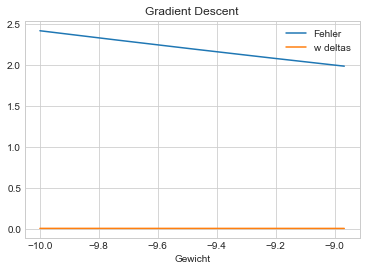

In [6]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def func_id(x):
    return x

def func_sigmoid(x):
    return 1.0 / (1.0+np.exp(-x))

# Initialisierungen
x = 0.2
y = x
eta = 0.01

# Startgewicht
weight = -10.0

# Für den Plot
weights = []
errors = []
w_deltas = []

# Tabelle erzeugen
print("Input x = {:.6f}, Gewünschter Output y = {:.2f}".format(x,y))
print("{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}".format('Iter', 'x', 'w', 'net i', 'a', 'y_hat', 'y', 'E', "E'", 'w delta'))

# Fixe 121 Schritte
for step in range(200):
    
    # Net input berechnen
    net_i = weight * x
    
    # Aktivierung (identische Funktion)
    activation = func_id(net_i)
    
    # Errechneter Output
    y_hat = activation
    
    # Quadratischer Fehler: Gewünschter - errechneter Wert
    error = 0.5 * (y - y_hat)**2
    
    # Gradient
    derivative = (-1.0)*func_sigmoid(x)*(1.0-func_sigmoid(x))*(y - y_hat)
    
    # Delta für Gewichtsanpassung
    w_delta = (-1)*derivative*eta
    
    # Daten für den Plot (weight, error)
    weights.append(weight)
    errors.append(error)
    w_deltas.append(w_delta)
    
    # Ausgabe der Änderung alle 10 Schritte
    if step % 10 == 0:
        print("{}\t{}\t{:6.2f}\t{:5.2f}\t{:5.2f}\t{:5.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(step, x, weight, net_i, activation, y_hat, y, error, derivative, w_delta))
        
    # Gewichtsanspassung = Lernen
    weight += w_delta
    
# Plot erzeugen
# Figure und Subplot
fig, ax1 = plt.subplots()
ax1.plot(weights, errors, label="Fehler")
ax1.plot(weights, w_deltas, label="w deltas")

# Titel
ax1.set_title('Gradient Descent')

# Legende
legend = ax1.legend(loc='best', fancybox=True, framealpha=0.5)

# Raster
plt.style.use('seaborn-whitegrid')

# Label
plt.xlabel('Gewicht')
plt.show()

# Back-Propagation

Multi-Layer Perceptron - Netzwerkarchitektur
[[  1.000   1.000   1.000   1.000   1.000]
 [  0.000   0.000   0.000   0.000   0.000]
 [  0.000   0.000   0.000   0.000   0.000]]
----------v----------
[[  7.495  -5.248  -6.321]
 [  2.108  -5.657  -5.653]
 [ -6.578   4.224   4.223]]
----------v----------
[[  1.000   1.000   1.000   1.000  -0.005]
 [  2.108   0.892   0.892   0.097   0.001]
 [ -6.578   0.001   0.001   0.001   0.000]]
----------v----------
[[  0.416  -0.959   0.940]
 [  4.037  -8.164  -8.261]]
----------v----------
[[  0.000   0.000   0.000   0.000   0.000]
 [ -3.253   0.037   0.037   0.036  -0.001]]
----------v----------
Predict:
[  1.000   1.000   1.000] 0.0 -> [  0.042]
[  1.000   0.000   1.000] 1.0 -> [  0.957]
[  1.000   1.000   0.000] 1.0 -> [  0.957]
[  1.000   0.000   0.000] 0.0 -> [  0.037]


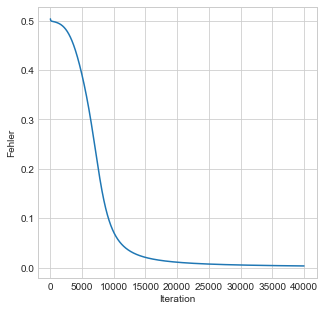

In [12]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn.utils.validation import check_random_state


def func_id(x):
    return x

# Aktivierungsfunktion: Sigmoide
def func_sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

# Rectified Linear Unit
def func_relu(x):
    return np.maximum(x, 0)

class MLP(object):
    def __init__(self, n_input_neurons=2, n_hidden_neurons=2, n_output_neurons=1, weights=None, eta=0.01, n_iterations=10, random_state=2, *args, **kwargs):
        """
        Initialisierung des Netzwerks
        Input-Hidden-Output
        Anzahl der Neuronen ist flexibel
        """
        
        # Aktivierungs und Output-Funktion
        self.f_akt = func_sigmoid
        self.g_out = func_id
        
        # Anzahl der Neuronen pro Layer
        self.n_input_neurons = n_input_neurons
        self.n_hidden_neurons = n_hidden_neurons
        self.n_output_neurons = n_output_neurons
        
        # Gewichtsinitialisierung
        self.weights = weights
        W_IH=[]
        W_HO=[]
        
        # Lernrate
        self.eta = eta
        
        # Iterationen
        self.n_iterations = n_iterations
        
        # Zufallsgenerator
        self.random_state = random_state
        
        #Erzeugung des Zufallsgenerator
        random_state = check_random_state(self.random_state)
        
        # Fehler beim fit
        self.errors=[]
        
        # Hier werden alle Daten zur Netzberechnung abgelegt
        self.network=[]
        
        # Input Layer + Bias Neuron: Spalten = n
        # et_i, a_i, o_i, d_i, delta_i
        self.inputLayer = np.zeros((self.n_input_neurons+1,5))
        
        # Bias-Neuron Output ist immer +1
        self.inputLayer[0] = 1.0
        
        # Den Input Layer zum Netzwerk hinzufügen
        self.network.append(self.inputLayer)
        
        # Weights von Input Layer zum Hidden Layer W_IH
        # Neuron: Zeile x Spalten: Zeilen = # Hidden, Spalten = # Input
        # Nur initialisieren, falls tatsächlich Gewichte vorhanden
        if weights:
            W_IH = self.weights[0]
        else:
            W_IH = 2 * random_state.random_sample((self.n_hidden_neurons+1, self.n_input_neurons+1)) - 1
        self.network.append(W_IH)
        
        # Hidden Layer + Bias-Neuron: Spalten = net_i,a_i,o_i, d_i, delta_i
        self.hiddenLayer = np.zeros((self.n_hidden_neurons+1,5))
        
        # Bias-Neuron-Output ist immer +1
        self.hiddenLayer[0] = 1.0
        
        # Den Hidden Layer zum Netzwerk hinzufügen
        self.network.append(self.hiddenLayer)
        
        # Weights von Hidden Layer zum Output Layer W_HO
        # Neuron: Zeile x Spalten: Zeilen = # Output, Spalten = # Hidden
        if weights:
            W_HO = self.weights[1]
        else:
            W_HO = 2 * random_state.random_sample((self.n_output_neurons+1, self.n_hidden_neurons+1)) - 1
        self.network.append(W_HO)
        
        # Output-Layer + Bias-Neuron: Spalten = net_i, a_i, o_i, d_i, delta_i
        self.outputLayer = np.zeros((self.n_output_neurons+1,5))
        
        # Bias-Neuron Output = 0, da nicht relevant
        # Nur wegen einheitlicher Indizierung vorhanden
        self.outputLayer[0] = 0.0
        
        # Den Output-Layer zum Netzwerk hinzufügen
        self.network.append(self.outputLayer)
        
    def print(self):
        print('Multi-Layer Perceptron - Netzwerkarchitektur')
        # Insgesamt 7 Stellen, mit drei Nachkommastellen ausgeben
        np.set_printoptions(formatter={'float': lambda x: "{0:7.3f}".format(x)})
        for nn_part in self.network:
            print(nn_part)
            print('----------v----------')
            
    def fit(self, X, Y):
        """
        Lernmethode
        """
        
        # Gewichtsänderung
        delta_w_jk = []
        delta_w_ij = []
        
        # Fehler
        self.errors = []
        
        # Alle Iterationen
        for iteration in range(self.n_iterations):
            # Für alle Trainingsbeispiele
            error = 0.0
            
            # for xIdx, x in enumerate(X)
            for x,y in zip(X,Y):
                
                ####################
                # Vorwärtspfad
                y_hat = self.predict(x)
                
                # Differenz
                diff = y - y_hat
                
                # Quadratischer Fehler
                error += 0.5 * np.sum(diff * diff)
                
                # Für eine kompaktere Notation
                net = self.network
                
                #####################
                # Output-Layer
                # delta_k in der Output-Schicht = der_k * diff
                net[4][:,4] = net[4][:,3] * diff
                
                ####################
                # Hidden Layer
                # delta_j in der Hidden-Schicht = der_j * dot(W_kj, delta_k)
                net[2][:,4] = net[2][:,3] * np.dot(net[3][:].T, net[4][:,4])
                
                ####################
                # Gewichtsdelta von W_kj
                # delta_w = eta * delta_k . o_j^T
                delta_w_jk = self.eta * np.outer(net[4][:,4], net[2][:,2].T)
                
                ####################
                # Gewcihtsdelta von W_ji
                # delta_w = eta * delta_j . o_i^T
                delta_w_ij = self.eta * np.outer(net[2][:,4], net[0][:,2].T)
                
                ####################
                # Gewichte anpassen
                net[1][:,:] += delta_w_ij
                net[3][:,:] += delta_w_jk
                
            # Sammeln des Fehlers für alle Beispiele
            self.errors.append(error)
                
                
            
    def predict(self,x):
        """
        Für Eingabe x wird Ausgabe y_hat berechnet
        Für den Vektor x wird eine Vorhersage berechnet und 
        die Matrizenwerte der Layer (nicht Gewichte) werden angepasst
        """
        
        ##################
        # Input Layer
        # Die Input-Werte setzen: Alle Zeilen, Spalte 2
        self.network[0][:,2] = x
        
        
        ###################
        # Hidden Layer
        # Start von Zeile 1 wegen Bias-Neuron aus Indexposition 0
        # net_i = W_ij . x
        self.network[2][1:,0] = np.dot(self.network[1][1:,:], self.network[0][:,2])
        
        # a_j
        self.network[2][1:,1] = self.f_akt(self.network[2][1:,0])
        
        # o_j
        self.network[2][1:,2] = self.g_out(self.network[2][1:,1])
        
        # der_j = o_j*(1-o_j) Ableitung für Sigmoide
        self.network[2][1:,3] = self.network[2][1:,2] * (1.0 - self.network[2][1:,2])
        
        
        ###################
        # Output-Layer
        # Start von Zeile 1 wegen Bias-Neuron auf 0
        # net_k = W_jk . h
        self.network[4][1:,0] = np.dot(self.network[3][1:,:], self.network[2][:,2])
        
        # a_k
        self.network[4][1:,1] = self.f_akt(self.network[4][1:,0])
        
        # o_k
        self.network[4][1:,2] = self.g_out(self.network[4][1:,1])
        
        # der_k = o_k * (1-o_k) Ableitung für Sigmoide
        self.network[4][1:,3] = self.network[4][1:,2] * (1.0 - self.network[4][1:,2])
        
        # Rückgabe Output Vektor
        return self.network[4][:,2]
    
    def plot(self):
        """
        Ausgabe des Fehlers
        Die im Fehlerarray gespeicherten Fehler als Grafik ausgeben
        """
        
        # Figure Nummern starten
        fignr = 1
        
        # Druckgröße in inch
        plt.figure(fignr, figsize=(5,5))
        
        # Ausgabe Fehler als Plot
        plt.plot(self.errors)
        
        # Raster
        plt.style.use('seaborn-whitegrid')
        
        # Labels
        plt.xlabel('Iteration')
        plt.ylabel('Fehler')
        
        
    
def main():
    # Initialisierung der Gewichte
    # W_IH = np.matrix([[0.0,0.0,0.0], [-10,20.0,20.0],[30,-20.0,-20.0]])
    # W_HO = np.matrix([[0.0,0.0,0.0], [-30, 20.0, 20.0]])
    # weights=[]
    # weights.append(W_IH)
    # weights.append(W_HO)
    # nn = MLP(weights=weights)
    
    # Initialisierung der Trainingsbeispiele
    X = np.array([[1.0,1.0,1.0], [1.0,0,1.0], [1.0,1.0,0], [1.0,0,0]])
    Y = np.array([[0.0,0.0], [0.0,1.0], [0.0,1.0], [0.0,0.0]])
    
    # Netzwerk initialisieren
    nn = MLP(eta=0.03, n_iterations=40000, random_state=42)

    # Training des Netzes mit der fit-Methode
    # Netzwerk ausgeben
    nn.fit(X,Y)
    nn.print()
    
    # Error-Ausgabe als Graph
    nn.plot()
    
    # Test
    # X = np.array([[1.0,1.0,1.0], [1.0,0,1.0], [1.0,1.0,0], [1.0,0,0]])
    # y = np.array([0,1.0,1.0,0])
    
    print('Predict:')
    for x,y in zip(X,Y):
        print('{} {} -> {}'.format(x,y[1],nn.predict(x)[1:2]))
        
        
# Et voilà
main()

In [13]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("Shape Trainingsdaten: {}".format(train_images.shape))
print("Dimension Bild Nr. 5: {}".format(train_image[5].shape))
print("Label zu Bild Nr. 5: {}".format(train_labels[5]))


ModuleNotFoundError: No module named 'tensorflow'